In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
clutches_df = pd.read_csv("./out/Clutches.csv", names=["nickname", "clt"]).sort_values("nickname")
damagedelta_df = pd.read_csv("./out/DamageDeltaPerRound.csv", names=["nickname", "ddpr"]).sort_values("nickname")
kdr_df = pd.read_csv("./out/KDRatio.csv", names=["nickname", "kdr"]).sort_values("nickname")
kpr_df = pd.read_csv("./out/KillsPerRound.csv", names=["nickname", "kpr"]).sort_values("nickname")
playtime_df = pd.read_csv("./out/Playtime.csv", names=["nickname", "hrs"]).sort_values("nickname")
acs_df = pd.read_csv("./out/ScorePerRound.csv", names=["nickname", "acs"]).sort_values("nickname")
winrate_df = pd.read_csv("./out/WinPercentage.csv", names=["nickname", "wr"]).sort_values("nickname")


In [3]:
winrate_df["wr"] = winrate_df["wr"].str.rstrip("%").astype("float") / 100
winrate_df

,nickname,wr
12049,0 iq Tr1ck3r,0.513
3733,000,0.591
14633,0000000,0.493
19362,0000000,0.438
4318,000000000,0.582
...,...,...
8963,ï¾ wezr ï¾,0.537
6297,ï¾ Gamora ï¾,0.560
5346,ï¾ StarLord ï¾,0.570
20381,ï¾ ZDEWNIY,0.400


In [4]:
playtime_df["hrs"] = playtime_df["hrs"].str.rstrip("h")
playtime_df

,nickname,hrs
1667,0000000,80
1894,016,77
930,07kaido,95
2068,0RhN,75
301,0Tim,119
...,...,...
10027,ï½ï½ï½ï½ï½ï½ï½,53
8051,ï½ï½ï½ï½ï½ï½ï½,53
6387,ï½ï½ï½ï½ï½ï½ï½,53
2273,ï¾ StarLord ï¾,73


In [5]:
winrate_clutches = winrate_df.merge(clutches_df, on="nickname").drop("nickname", axis=1)
winrate_clutches.corr()

,wr,clt
wr,1.00000,-0.03863
clt,-0.03863,1.00000


In [6]:
winrate_damagedelta = winrate_df.merge(damagedelta_df, on="nickname").drop("nickname", axis=1)
winrate_damagedelta.corr()

,wr,ddpr
wr,1.0000,0.3771
ddpr,0.3771,1.0000


In [7]:
winrate_kdr = winrate_df.merge(kdr_df, on="nickname").drop("nickname", axis=1)
winrate_kdr.corr()

,wr,kdr
wr,1.000000,0.429266
kdr,0.429266,1.000000


In [8]:
winrate_kpr = winrate_df.merge(kpr_df, on="nickname").drop("nickname", axis=1)
winrate_kpr.corr()

,wr,kpr
wr,1.000000,0.323912
kpr,0.323912,1.000000


In [9]:
winrate_playtime = winrate_df.merge(playtime_df, on="nickname").drop("nickname", axis=1)
winrate_playtime.corr()

,wr,hrs
wr,1.00000,-0.05752
hrs,-0.05752,1.00000


In [10]:
winrate_acs = winrate_df.merge(acs_df, on="nickname").drop("nickname", axis=1)
winrate_acs.corr()

,wr,acs
wr,1.000000,0.298184
acs,0.298184,1.000000


<Axes: xlabel='wr'>

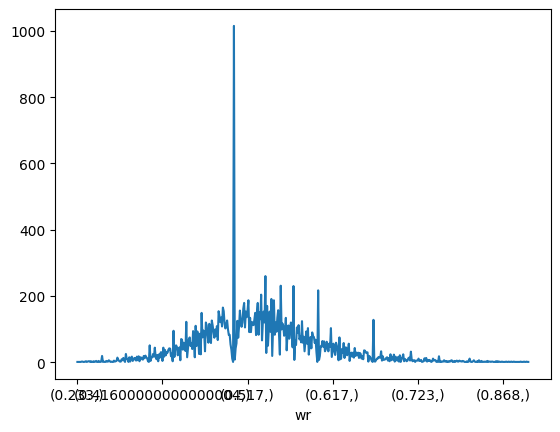

In [11]:
winrate_df.drop("nickname", axis=1).value_counts().sort_index().plot()

In [12]:
winrate_df.drop("nickname", axis=1).value_counts().sort_values(ascending=False)

wr   
0.500    1015
0.538     260
0.556     231
0.571     230
0.600     217
         ... 
0.930       1
0.927       1
0.854       1
0.917       1
0.967       1
Name: count, Length: 531, dtype: int64

In [13]:
winrate_df.drop("nickname", axis=1).mean()

wr    0.531855
dtype: float64

In [14]:
winrate_df.drop("nickname", axis=1).median()

wr    0.526
dtype: float64

<Axes: xlabel='kdr'>

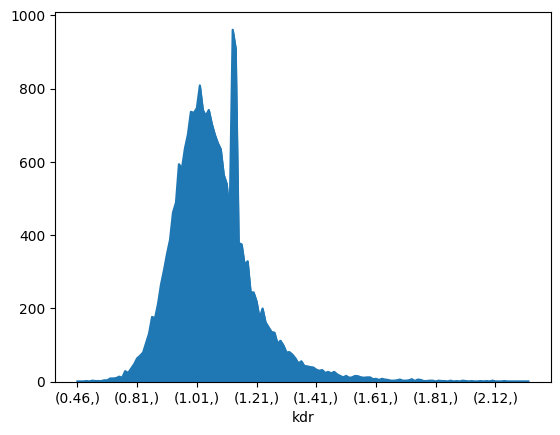

In [15]:
kdr_df.drop("nickname", axis=1).value_counts().sort_index().plot(kind="area")

In [16]:
kdr_df.drop("nickname", axis=1).median()

kdr    1.05
dtype: float64

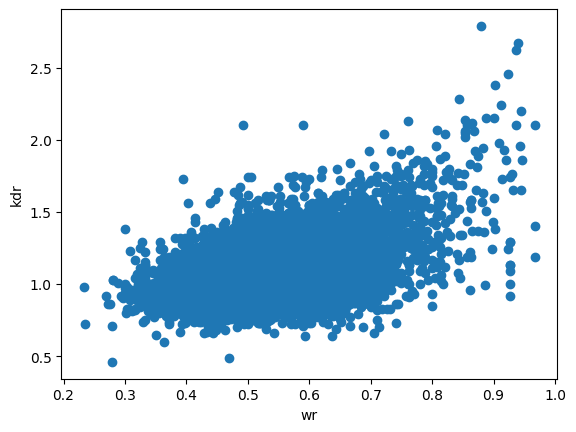

In [141]:
plt.xlabel("wr")
plt.ylabel("kdr")
plt.scatter(winrate_kdr["wr"], winrate_kdr["kdr"])

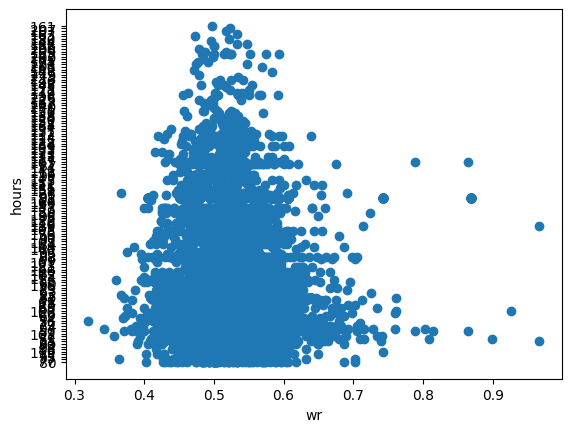

In [173]:
plt.xlabel("wr")
plt.ylabel("hours")
plt.scatter(winrate_playtime["wr"], winrate_playtime["hrs"])

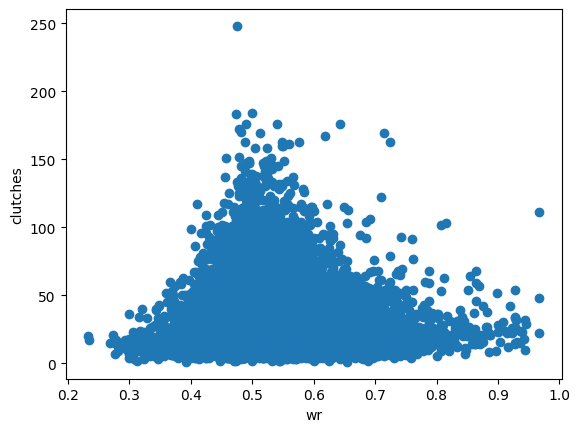

In [177]:
plt.xlabel("wr")
plt.ylabel("clutches")
plt.scatter(winrate_clutches["wr"], winrate_clutches["clt"])

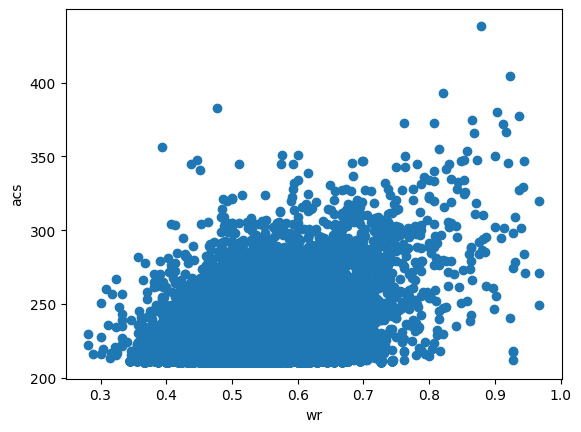

In [178]:
plt.xlabel("wr")
plt.ylabel("acs")
plt.scatter(winrate_acs["wr"], winrate_acs["acs"])